In [ ]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf

In [ ]:
SEED = 12
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)
print("시드 : ", SEED)

시드 :  12


# 데이터

In [ ]:
from sklearn import datasets
housing = datasets.load_boston()
X_data = housing.data
y_data = housing.target
print(X_data.shape, y_data.shape)

(506, 13) (506,)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# 피쳐 스케일링
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_data_scaled = scaler.fit_transform(X_data)

X_data_scaled[0]

array([0.        , 0.18      , 0.06781525, 0.        , 0.31481481,
       0.57750527, 0.64160659, 0.26920314, 0.        , 0.20801527,
       0.28723404, 1.        , 0.08967991])

In [ ]:
# 학습/훈련 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data_scaled, y_data,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=SEED)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


# MLP 모델 아키텍처 정의

- 입력 데이터 피처 : 13개

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

def build_model(num_input = 1):
  model = Sequential()
  model.add(Dense(128, activation='relu', input_dim=num_input))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(1, activation='linear'))

  model.compile(optimizer='adam', loss='mse', metrics=['mae'])

  return model

model = build_model(num_input=13) # 입력 데이터 피처 13개
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1792      
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 dense_9 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


## 미니 배치 학습
- 전체 입력 데이터를 32개씩 구분해 배치를 만듦.
  - 훈련 데이터 샘플수는 404개이므로, 32개씩 묶으면 모두 13개의 미니 배치가 만들어짐.

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
13/13 - 1s - loss: 553.2745 - mae: 21.6011 - 521ms/epoch - 40ms/step
Epoch 2/100
13/13 - 0s - loss: 449.6648 - mae: 18.9168 - 31ms/epoch - 2ms/step
Epoch 3/100
13/13 - 0s - loss: 244.8190 - mae: 12.5898 - 35ms/epoch - 3ms/step
Epoch 4/100
13/13 - 0s - loss: 121.0187 - mae: 8.5564 - 43ms/epoch - 3ms/step
Epoch 5/100
13/13 - 0s - loss: 95.8953 - mae: 7.4097 - 31ms/epoch - 2ms/step
Epoch 6/100
13/13 - 0s - loss: 73.6780 - mae: 6.1901 - 33ms/epoch - 3ms/step
Epoch 7/100
13/13 - 0s - loss: 64.3468 - mae: 5.9559 - 34ms/epoch - 3ms/step
Epoch 8/100
13/13 - 0s - loss: 56.3361 - mae: 5.2009 - 29ms/epoch - 2ms/step
Epoch 9/100
13/13 - 0s - loss: 51.1879 - mae: 5.0533 - 39ms/epoch - 3ms/step
Epoch 10/100
13/13 - 0s - loss: 47.2112 - mae: 4.8509 - 31ms/epoch - 2ms/step
Epoch 11/100
13/13 - 0s - loss: 43.2686 - mae: 4.5390 - 30ms/epoch - 2ms/step
Epoch 12/100
13/13 - 0s - loss: 40.1331 - mae: 4.4945 - 30ms/epoch - 2ms/step
Epoch 13/100
13/13 - 0s - loss: 35.5350 - mae: 4.1076 - 43ms/epo

In [ ]:
# 평가
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 11.0208 - mae: 2.4209


[11.020828247070312, 2.420856237411499]

# 교차 검증 적용 (validation)

In [ ]:
model = build_model(num_input=13)
history = model.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.25, verbose=2)
# validation_split = 0.25

Epoch 1/200
10/10 - 1s - loss: 584.7120 - mae: 22.3473 - val_loss: 550.3346 - val_mae: 21.5485 - 665ms/epoch - 67ms/step
Epoch 2/200
10/10 - 0s - loss: 559.4054 - mae: 21.7561 - val_loss: 512.2502 - val_mae: 20.5951 - 61ms/epoch - 6ms/step
Epoch 3/200
10/10 - 0s - loss: 499.3816 - mae: 20.2524 - val_loss: 425.0727 - val_mae: 18.2158 - 60ms/epoch - 6ms/step
Epoch 4/200
10/10 - 0s - loss: 378.0295 - mae: 16.8274 - val_loss: 270.3862 - val_mae: 13.2162 - 49ms/epoch - 5ms/step
Epoch 5/200
10/10 - 0s - loss: 207.1509 - mae: 11.4735 - val_loss: 142.3929 - val_mae: 9.3240 - 53ms/epoch - 5ms/step
Epoch 6/200
10/10 - 0s - loss: 147.5130 - mae: 9.6814 - val_loss: 138.2364 - val_mae: 9.4022 - 50ms/epoch - 5ms/step
Epoch 7/200
10/10 - 0s - loss: 123.5804 - mae: 8.6931 - val_loss: 107.5817 - val_mae: 7.8643 - 53ms/epoch - 5ms/step
Epoch 8/200
10/10 - 0s - loss: 103.8201 - mae: 7.6913 - val_loss: 92.0946 - val_mae: 7.2172 - 48ms/epoch - 5ms/step
Epoch 9/200
10/10 - 0s - loss: 89.6529 - mae: 7.0870 -

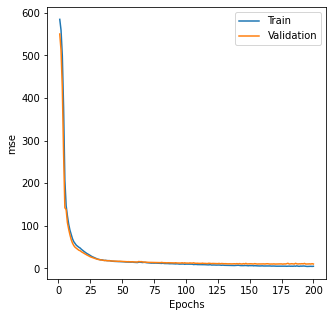

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curve(total_epoch=10, start=1) :
  plt.figure(figsize=(5, 5))
  plt.plot(range(start, total_epoch+1),
           history.history['loss'][start-1 : total_epoch],
           label='Train')
  plt.plot(range(start, total_epoch+1),
           history.history['val_loss'][start-1 : total_epoch],
           label='Validation')
  plt.xlabel('Epochs')
  plt.ylabel('mse')
  plt.legend()
  plt.show()

plot_loss_curve(total_epoch=200, start=1)

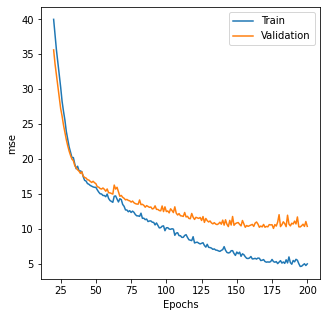

In [ ]:
plot_loss_curve(total_epoch=200, start=20) # 20 에폭 이후의 손실 함수.
# 40 에폭 이후, gap 이 커지는 것을 확인 가능.